<a href="https://colab.research.google.com/github/YorkU-Cameroon/ml_labs/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Objectives

#### Introducing Transfer Learning
#### High level understaning of neural network layers
#### How to train networks that are on a par with other state-of-the-art models


# Questions

#### What are dropouts? 
#### What is Fine-tuning?
#### Name 5 steps of Fine Tuning?
#### What do we mean by Transfer Learning ?
#### Why do we sometimes Freeze some part of a model?
#### which part of a model is for Features extract and what part is responsible for classification ?





# Configure if pre-trained models are used

For this lab by default we will use pre-trained models and history variables because you will not have time to train these models but we have provided the code should you want to try on your own time. (If you want to try doing the training simply uncheck the box below)

This is particularly important for cats_and_dogs_small_4.h5

It could take over 10 hours to train depending on the CPU/GPU capacity !!!

In [ ]:
use_saved_model = True #@param {type:"boolean"}


In [ ]:
## Transfer Learning is using the pre-trained model and customized it to our own data

import keras

keras.__version__



'2.4.3'

# Downloading our data set


In [ ]:
!wget --no-check-certificate https://filetransfer.io/data-package/YTrkn3Yk/download -O /content/all.zip

In [ ]:
# Note this cell may take a long time to run but will show no output because it would have shown over 5000 lines of output and require a lot of scrolling
from pathlib import Path
!unzip all.zip > /dev/null
Path('/content/data').mkdir(parents=True, exist_ok=True)
!unzip test1.zip -d /content/data > /dev/null
!unzip train.zip -d /content/data > /dev/null

# Importing VGG16

In [ ]:
#From the input layer to the last max pooling layer is 
#regarded as the feature extraction part of the model, while the rest of the 
#network is regarded as the classification part of the model.


################################################################
########### importing th VGG16 without its last layers ##########
################################################################


from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
############################################################
########### Imporiting and partitioning the data ##########
############################################################
#These new last layers will give us the featrues now

import shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/data/train'

# The directory where we will
# store our smaller dataset
base_dir = '/content/data/transfer-learning'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
Path(train_dir).mkdir(parents=True, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
Path(validation_dir).mkdir(parents=True, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
Path(test_dir).mkdir(parents=True, exist_ok=True)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
Path(train_cats_dir).mkdir(parents=True, exist_ok=True)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
Path(train_dogs_dir).mkdir(parents=True, exist_ok=True)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
Path(validation_cats_dir).mkdir(parents=True, exist_ok=True)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
Path(validation_dogs_dir).mkdir(parents=True, exist_ok=True)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
Path(test_cats_dir).mkdir(parents=True, exist_ok=True)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
Path(test_dogs_dir).mkdir(parents=True, exist_ok=True)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Feature extraction

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## rescale: rescaling factor. Defaults to None. 
## If None or 0, no rescaling is applied, otherwise we multiply the data by the
## value provided (after applying all other transformations).
## rescale pixle to make them between 0 and 1. since our orginal rgb number are between 0 to 255

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20



# Gettign feature for ONLY one image 

#from keras.preprocessing import image
#from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import preprocess_input
#import numpy as np
#model = VGG16(weights='imagenet', include_top=False)
#model.summary()
#img_path = 'train/dogs/1.jpg'
#img = image.load_img(img_path, target_size=(224, 224))
#img_data = image.img_to_array(img)
#img_data = np.expand_dims(img_data, axis=0)
#img_data = preprocess_input(img_data)
#vgg16_feature = model.predict(img_data)
#print vgg16_feature.shape


# OR DEFINE IT AS A FUNCTION ! and populate features and labels numpy arrays

######################################################################
########### Outer last layers will give us the featrues now ##########
######################################################################

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))

    ## getting data from datagen object 
    ## the outputs look like one of the form 
                     # - (inputs, targets)    
                     # - (input, targets, sample_weights)

    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0

    ## here are are populating Features and Labels numpy array with the data
    ## in datagen object using the flow_from_directory 

    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

#
#
## THIS COULD TAKE SOME TIME SO DON'T WORRY... YOU SHOULD SEE THE FOLLOWING OUTPUT:
# (it will take time to show each of the following lines sequentially)
#
# Found 2000 images belonging to 2 classes.
# Found 1000 images belonging to 2 classes.
# Found 1000 images belonging to 2 classes.
#
#
#
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
## Changing the Dimetion , to make them flatten

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))



#Create a Model
with a dense layer with relu activation function. Add a dropout layer with rate 0.5. Output a binary result using sigmoid function

In [ ]:
## At this point, we can define our densely-connected ##classifier 

##(note the use of dropout for regularization ), and train it on the data and labels that we just recorded:
## droup out help us to leave a portion of traning data aside in each iteration so that we can decrease the chance of having overfitting.
## making sure the previously trained weight does not CHANGE!

if not use_saved_model:
  from keras import models
  from keras import layers
  from keras import optimizers

  model = models.Sequential()

  model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

  ## we have used the pre-trained features and only training the last 3 layers above.


  history = model.fit(train_features, train_labels,
                      epochs=30,
                      batch_size=20,
                      validation_data=(validation_features, validation_labels))

else:
  import json
  !wget 'https://drive.google.com/uc?export=download&id=1i7OxvA0kx50VnFKQdhoynbJVXdRx0khp' -O history1.json
  # Loading the history data 
  with open('history1.json') as f:
    history = type('',(),{'history': json.load(f)})

# Ploting the results

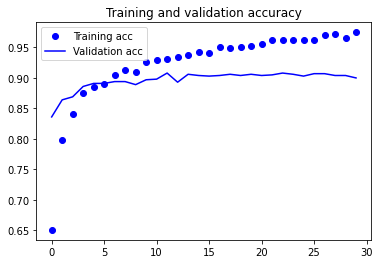

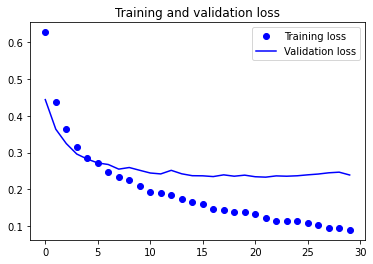

In [ ]:
#Training is very fast, since we only have to deal with two `Dense` layers -- 
# an epoch takes less than one second even on CPU.


#Let's take a look at the loss and accuracy curves during training:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

########################################################################################
################# Stduent task : Using the 4 above vectors, Plot  ######################
########################################################################################
# Training and validation accuracy as well as Training and validation loss
# also try to interpret the resulting plots.


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Retraining model with some frozen layers

In [ ]:
## lets now add our previously trained model ( make sure to freeze it so weights do not change)

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## freezing pre-trained model
conv_base.trainable = False


# Data Agumentation

In [ ]:
# With this setup, only the weights from the two Dense layers that we added will be trained.
# That's a total of four weight tensors: two per layer (the main weight matrix and the bias vector). 

##What does data augmentation mean?
  #Data augmentation is a strategy that enables practitioners to significantly 
  #increase the diversity of data available for training models, without actually
  #collecting new data. Data augmentation techniques such as cropping, padding, 
  #and horizontal flipping are commonly used to train large neural networks

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



**run** the following section if you have just loaded the pretrained model in the previous cell

In [ ]:
# .fit .fit_generator .fit_batch

### .fit:
  #Our entire training set can fit into RAM
  #There is no data augmentation going on (i.e., there is no need for Keras generators)

### .fit_generator:
  #Data are usually not that simple, so we might need data augmentation for better generalization
  #The generator function yields a batch of size BS  to the .fit_generator  function.
  #.fit_generator  function accepts the batch of data, performs backpropagation, and updates the weights in our model.
  ##steps_per_epoch ?
  #we compute the steps_per_epoch  value as the total number of training data 
  #points divided by the batch size. Once Keras hits this step 
  #count it knows that it’s a new epoch.



#
## THIS SECTION WILL ALSO TAKE SOME TIME TO RUN THROUGH ALL 50 EPOCHS 
# (quite a bit of time)
# don't worry about any deprecated flags - these are resolved
# NB: Not run if loading instead
#

if not use_saved_model:
  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

  history = model.fit_generator(
        train_generator,
        #steps_per_epoch=100,
        steps_per_epoch=10,
        #epochs=30,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=5
        #validation_steps=50
        #,verbose=2)
  )

else:
  import json
  !wget 'https://drive.google.com/uc?export=download&id=1N9fPnfWnDTGhzJllNqrLxeRaJeoC3IUJ' -O history2.json
  # Loading the history data 
  with open('history2.json') as f:
    history = type('',(),{'history':json.load(f)})


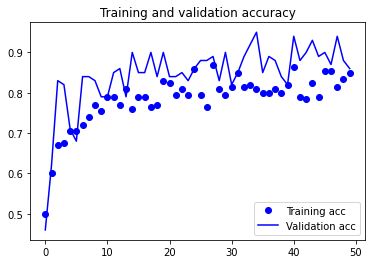

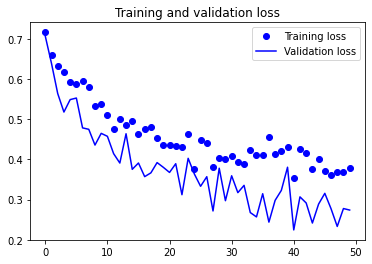

In [ ]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# BUT what is FINE TUNING 
# Fine-tuning Another widely used technique for model reuse, complementary to feature extraction, 
#is fine-tuning. Fine-tuning consists in unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly
#  added part of the model (in our case, the fully-connected classifier) and these top layers.


# HERE ARE THE STEPS
#1) Add your custom network on top of an already trained base network. (We have already completed the first 3 steps when doing feature extraction.)
#2) Freeze the base network. (We have already completed the first 3 steps when doing feature extraction.)
#3) Train the part you added. (We have already completed the first 3 steps when doing feature extraction.)
#4) Unfreeze some layers in the base network.
#5) Jointly train both these layers and the part you added.


conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Why not fine-tune more layers? Why not fine-tune the entire convolutional base? We could. However, we need to consider that:

Earlier layers in the convolutional base encode more generic, reusable features, while layers higher up encode more specialized features. It is more useful to fine-tune the more specialized features, as these are the ones that need to be repurposed on our new problem. There would be fast-decreasing returns in fine-tuning lower layers.
The more parameters we are training, the more we are at risk of overfitting. The convolutional base has 15M parameters, so it would be risky to attempt to train it on our small dataset.
Thus, in our situation, it is a good strategy to only fine-tune the top 2 to 3 layers in the convolutional base.

Let's set this up, starting from where we left off in the previous example:

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

!!!

!!! The next cell is code to train cats_and_dogs_small_4.h5

!!! It could take over 10 hours to train depending on the CPU/GPU capacity

!!! Therefore load the model instead but understand the section before moving on

!!!


In [ ]:
#
# This section takes a very long time to run - however in the next cell you will be able to load a pre-trained model
# the code is supplied for your curiosity and benefit

#
# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-5),
#               metrics=['acc'])

# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=100,
#       validation_data=validation_generator,
#       validation_steps=50)



In [ ]:
# 
# ONLY UNCOMMENT AND RUN IF YOU ARE TRAINING THE MODEL (FROM PREVIOUS CELL) ON YOUR OWN TIME
# 
# model.save('cats_and_dogs_small_4.h5')


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1IZsk8aPzZvOYwemdiO9fl2L8d0VgsyWq' -O  cats_and_dogs_small_Trained_model.h5

model = keras.models.load_model('cats_and_dogs_small_Trained_model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


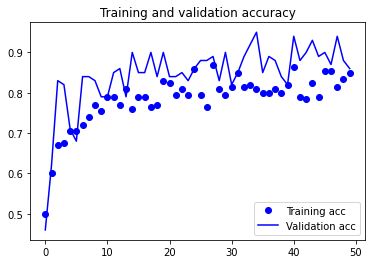

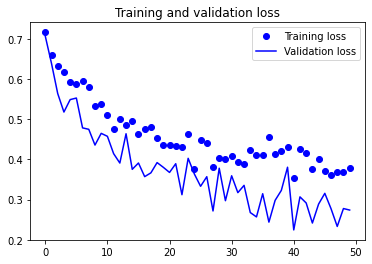

In [ ]:
## Let's plot our results using the same plotting code as before:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Smoothing curve

In [ ]:
## As you have seen the  plot is quit noisy 
## use the following fuctnion to smooth out the result of acc and loss


def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

  

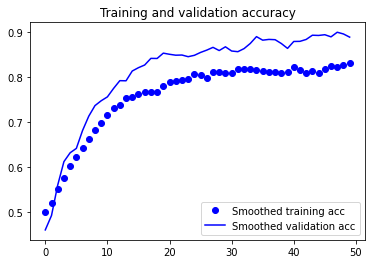

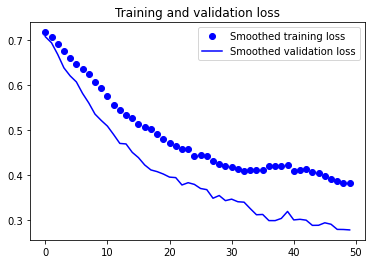

In [ ]:
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
### You may wonder, how could accuracy improve if the loss isn't decreasing? 
# ( Is the model improving? )

#ANSWER: The answer is simple: what we display is an average of pointwise 
#-loss values, but what actually matters for accuracy is the distribution
#-of the loss values, not their average, since accuracy is the result of 
#-a binary thresholding of the class probability predicted by the model.
#-The model may still be improving even if this isn't reflected in the average loss.






# **Exercise**

**1. 2.0 mark) Draw test data using the generator and pass them to the mode evaluate_generator to see machine prediction.**

1 - use test_dataget.flow_from_drictionary to take test_dir and generate batch sizes of 20
2- user evaluate_generator to evaluat your model, and report test_loss and test_acc over 50 steps)
3- print the test acc vector
(Hint: you need to generatre the data, you may use flow_from_directory. You must pass, dir, target_size,batch_size and class_mode to this routin.)





**2. 2.0 mark) Load the ResNet50 pre-trained model in a variable call model1:
Note: Get the model from keras.applications.resnet50 import ResNet50**





**3. 2.0 mark) Load the ResNet50 pre-trained model in a variable called model2 without its classifier layers. Your input shape should be 150x150 and it can take 3 channels:**
Hint: Pass include_top and input_shape to your model constructor.




**4. 1.0 mark) Use model summary on model1 and model2 to observe the layers responsible for classification. Simply name those layers.**



**5. 2.0 mark) Given that we are in the Fine-tuning phase of our learning and we want to make sure our next trainings do not change the weights computed in the first 8 convolutional layers. Write a piece of code that that freezes those layers.**
(Note: use get_layer method of model class to get a layer in order to access its attributes)

